# 基于 GINI 系数的CART方法

In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import preprocessing
import csv

***载入数据***

In [2]:
data = open(r'./cart.csv', 'r')
reader = csv.reader(data)

In [3]:
# 获取第一行数据
headers = reader.__next__()
print("headers: \n", headers)

featureList = []  # 存入每个人的信息
labelList = []    # 存入标签
for row in reader:
    # 把 label 存入 list
    labelList.append(row[-1])
    rowDict = {}
    for i in range(1, len(row)-1): # 第 0 行是表头，所以跳过
        # 建立一个数据字典
        rowDict[headers[i]] = row[i]
    featureList.append(rowDict)

print(featureList)

headers: 
 ['序号', '是否有房', '婚姻状况', '年收入', '是否拖欠贷款']
[{'是否有房': 'yes', '婚姻状况': 'single', '年收入': '125'}, {'是否有房': 'no', '婚姻状况': 'married', '年收入': '100'}, {'是否有房': 'no', '婚姻状况': 'single', '年收入': '70'}, {'是否有房': 'yes', '婚姻状况': 'married', '年收入': '120'}, {'是否有房': 'no', '婚姻状况': 'divorced', '年收入': '95'}, {'是否有房': 'no', '婚姻状况': 'married', '年收入': '60'}, {'是否有房': 'yes', '婚姻状况': 'divorced', '年收入': '220'}, {'是否有房': 'no', '婚姻状况': 'single', '年收入': '85'}, {'是否有房': 'no', '婚姻状况': 'married', '年收入': '75'}, {'是否有房': 'no', '婚姻状况': 'single', '年收入': '90'}]


***标签转换***

In [4]:
vectool = DictVectorizer()
x_data = vectool.fit_transform(featureList).toarray()
print("x_data: \n" + str(x_data))

x_data: 
[[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]]


In [5]:
lb = preprocessing.LabelBinarizer()
y_data = lb.fit_transform(labelList)
print("y_data: \n", y_data)

y_data: 
 [[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]]


***创建决策树模型，并训练***

In [6]:
# 创立决策树
model = tree.DecisionTreeClassifier()

#输入数据建立模型
model.fit(x_data, y_data)

DecisionTreeClassifier()

***测试***

In [7]:
x_test = x_data[0]
print("X_test: ", x_test, ", x_test_label = ", y_data[0])

predict = model.predict(x_test.reshape(1, -1))
print('predict: ', predict)

X_test:  [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.] , x_test_label =  [0]
predict:  [0]


***导出决策树***

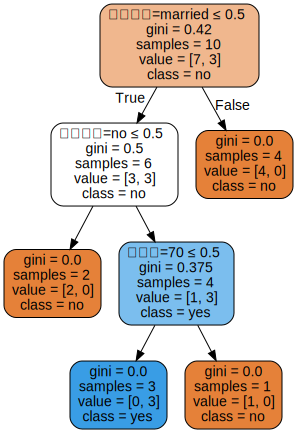

In [8]:
import graphviz

dot_data = tree.export_graphviz(model,
                               out_file=None,
                               feature_names=vectool.get_feature_names(),  # 特征名字
                               class_names=lb.classes_,         # 标签
                               filled=True,
                               rounded=True,
                               special_characters=True)

graph = graphviz.Source(dot_data)
graph

***对上图的解释：***

1. 结婚？ 结婚则 `married=1`， $1 \ge 0.5$，所以进入 `False` 节点，直接输出 `class = no`（Flase节点，sample = 4，表示有4个用例进入到该节点）；反之进入True节点；
2. 有房子？ 有则 `no=0`，$0 \le 0.5$，所以进入 `True` 节点，直接输出 `class = no`，反之进入 `True` 节点；
3. 年收入？ 是70W 则输出 `yes`，否则输出 `no`；

> 从第三个年收入的节点，我们可以看出，其针对 `70w` 做出了特判。因此有些过拟合的嫌疑。


***测试***

In [9]:
for idx in range(0, 9):
    x_test = x_data[idx]
    print("X_test: ", x_test, ", x_test_label = ", y_data[idx])

    predict = model.predict(x_test.reshape(1, -1))
    print('predict: ', predict)

X_test:  [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.] , x_test_label =  [0]
predict:  [0]
X_test:  [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] , x_test_label =  [0]
predict:  [0]
X_test:  [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.] , x_test_label =  [0]
predict:  [0]
X_test:  [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] , x_test_label =  [0]
predict:  [0]
X_test:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.] , x_test_label =  [1]
predict:  [1]
X_test:  [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.] , x_test_label =  [0]
predict:  [0]
X_test:  [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.] , x_test_label =  [0]
predict:  [0]
X_test:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.] , x_test_label =  [1]
predict:  [1]
X_test:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.] , x_test_label =  [0]
predict:  [0]
